In [1]:
#21992905 Zeynep Hafsa Dİlmaç
#21993035 Alihan Sağöz

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
#This dataset contains house sale prices for King County, which includes Seattle.
#It includes homes sold between May 2014 and May 2015.
url='https://drive.google.com/file/d/1A7q_JXexQ18tzwWApuiE19xOQAD7xbfd/view?usp=sharing'
url='https://drive.google.com/uc?id='+url.split('/')[-2]
df=pd.read_csv(url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#data preprocessing and data cleaning
#In this part, we need to analyze our data well. First we need to check if there is any duplicate data.
#If there is, we should remove it from our data. Then we should check if there are null values.
#If there is, we should either remove it or fill it with appropriate values(mean, mod, etc.).
#We should check if there are any lines that will not affect the prediction, if so, we should delete them.

In [4]:
#Let's look at the number of rows and columns of our data
print("Our data consists of ",df.shape[0]," rows and ",df.shape[1]," columns")

Our data consists of  21613  rows and  21  columns


In [5]:
#we must check whether duplicate values and drop them
df.drop_duplicates(inplace=True)
print(df.shape)

(21613, 21)


In [6]:
#so there was no duplicate data
for i in df.columns:
    print(df[i].nunique())

21436
372
4028
13
30
1038
9782
6
2
5
5
12
946
306
116
70
70
5034
752
777
8689


In [7]:
#Let's see how many null values are in each column
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#there is no null values so let's move on to the next step

In [9]:
#Id column and zipcode column do not effect our price predict so we must drop it
df.drop(columns=["id","zipcode"],inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
#now let's look at the types of our columns
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
#The date column is of object type as we can see. Let's fix this column so we can use it.
#Let's skip the expression with T and make its type an integer
df["date"] = pd.to_datetime(df["date"]).dt.strftime("%Y%m%d")
df=df.astype({"date":int})
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [13]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


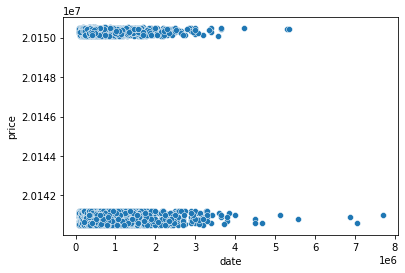

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


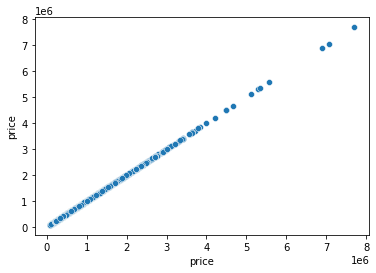

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


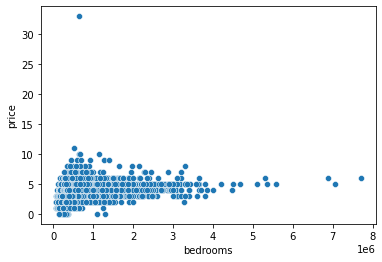

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


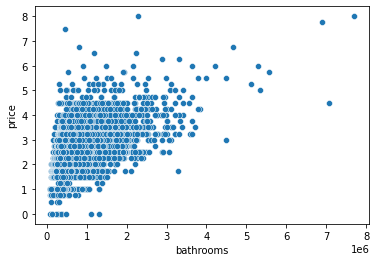

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


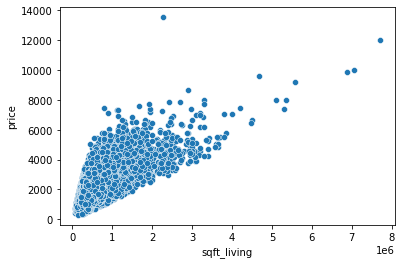

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


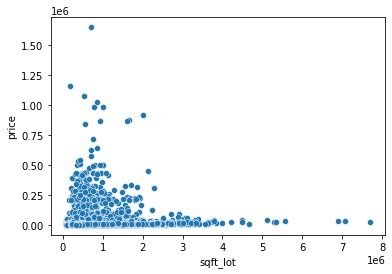

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


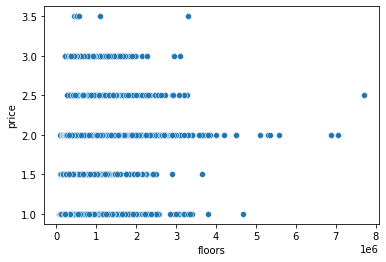

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


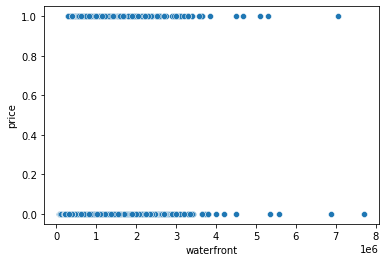

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


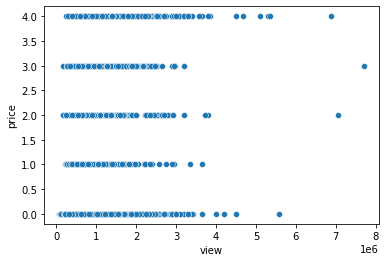

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


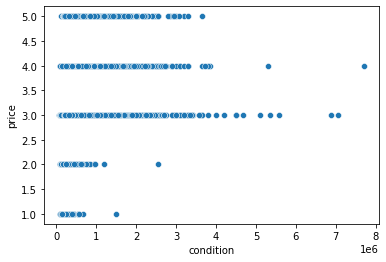

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


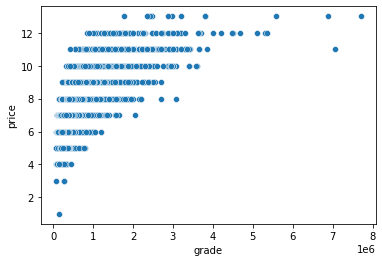

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


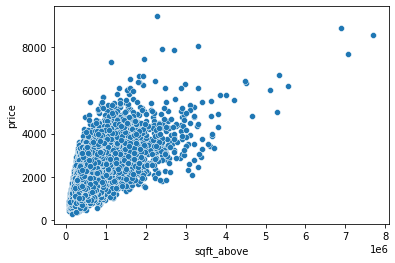

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


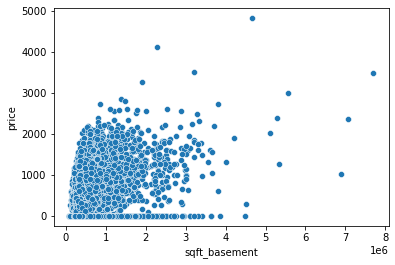

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


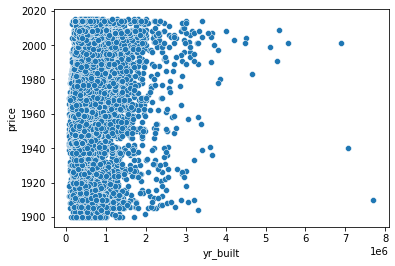

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


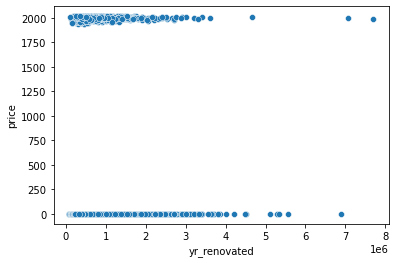

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


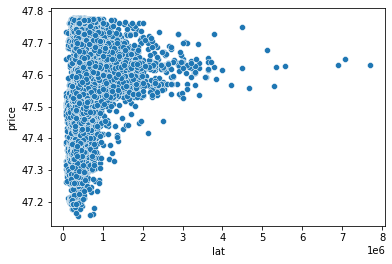

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


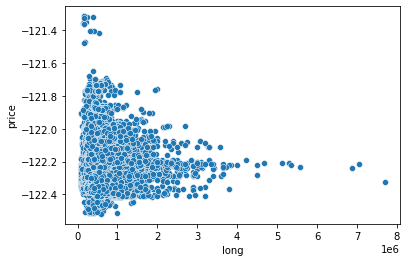

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


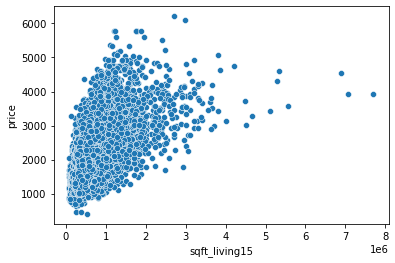

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


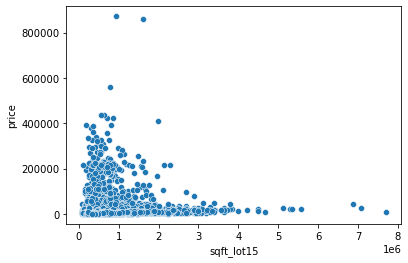

In [14]:
#Let's look at the relationship between each column and the "price" column with graphs.
for i in df.columns:
    sns.scatterplot(df["price"],df[i])
    plt.ylabel("price")
    plt.xlabel(i)
    plt.show()

In [15]:
#We can see in some graphs that there are outlier values. We need to find these values and remove them from our dataset.
#We already have a lot of data that we can use. Outlier values only mislead our estimation.

In [16]:
#detecting outliers with z score.
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.65134259 0.86671733 0.39873715 ... 0.30607896 0.9433552  0.26071541]
 [0.60716342 0.00568792 0.39873715 ... 0.74634143 0.43268619 0.18786773]
 [1.42507844 0.98084935 1.47395936 ... 0.13565477 1.07013975 0.17237524]
 ...
 [0.73925012 0.37586519 1.47395936 ... 0.60432128 1.41025258 0.39414129]
 [1.40050941 0.38158814 0.39873715 ... 1.02891048 0.8412214  0.42051149]
 [0.65089178 0.58588173 1.47395936 ... 0.60432128 1.41025258 0.41794772]]


In [17]:
#we detected outliers up there. now we are deleting.
df =df.loc[:, df.columns != 'waterfront'][(z < 6).all(axis=1)]
#we cancelled waterfront column because when we subtract the outlier values, the waterfront column dropped to a single value

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


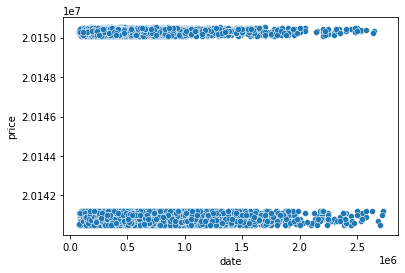

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


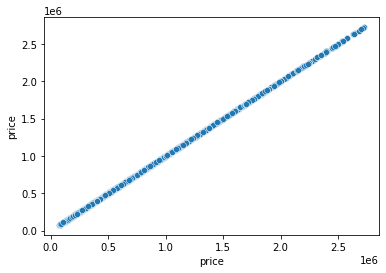

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


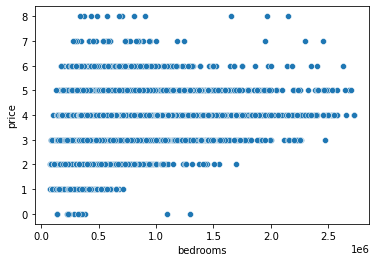

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


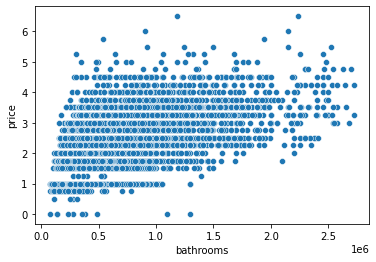

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


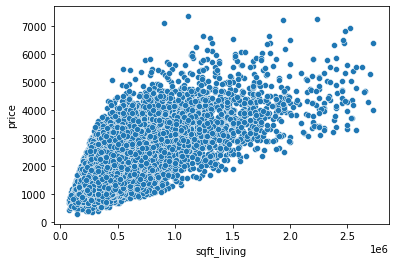

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


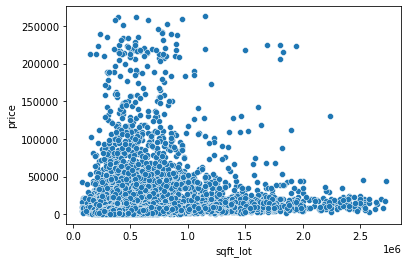

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


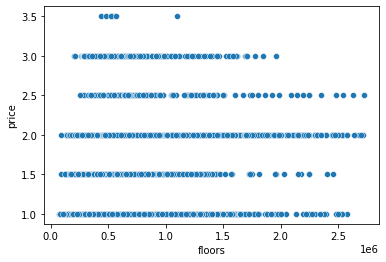

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


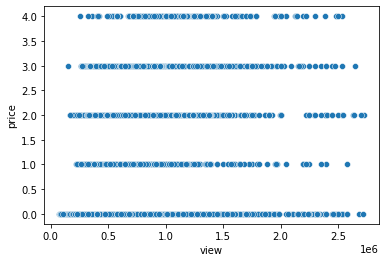

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


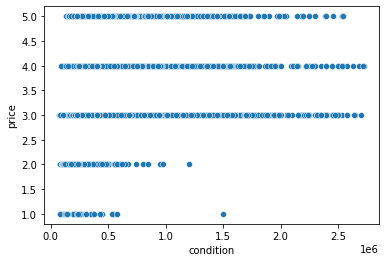

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


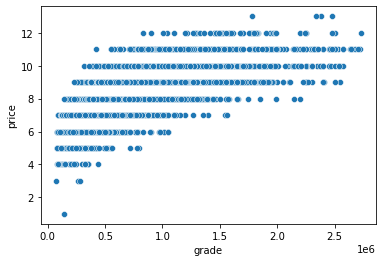

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


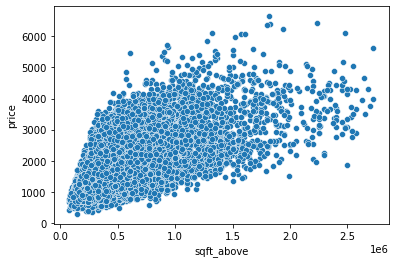

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


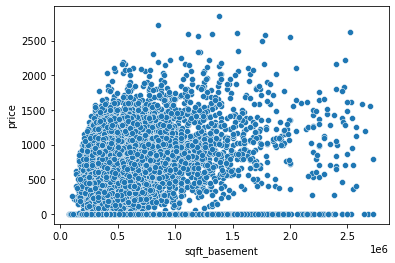

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


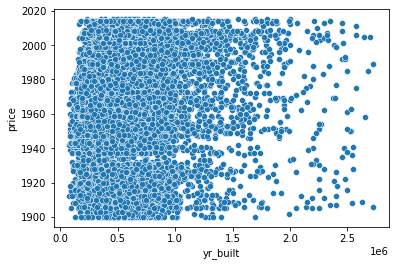

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


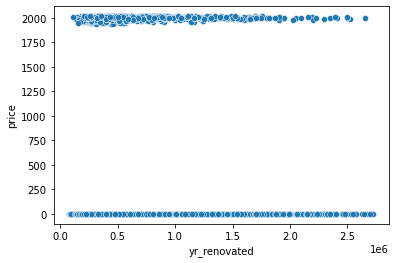

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


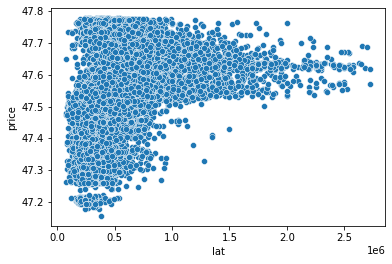

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


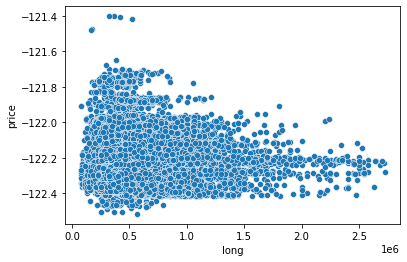

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


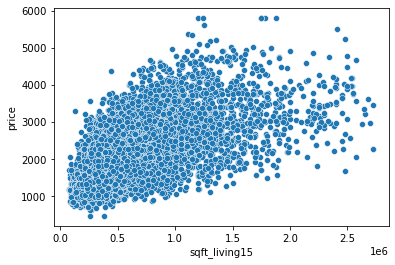

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


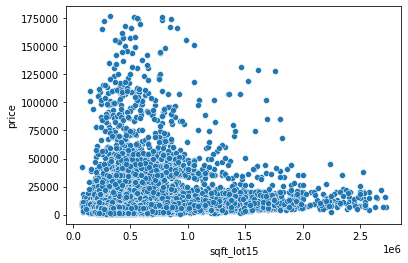

In [18]:
#Let's look at the relationship between each column and the "price" column with graphs again.
for i in df.columns:
    sns.scatterplot(df["price"],df[i])
    plt.ylabel("price")
    plt.xlabel(i)
    plt.show()

In [19]:
#we no longer have outlier values in our charts, so we have smoother charts

C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


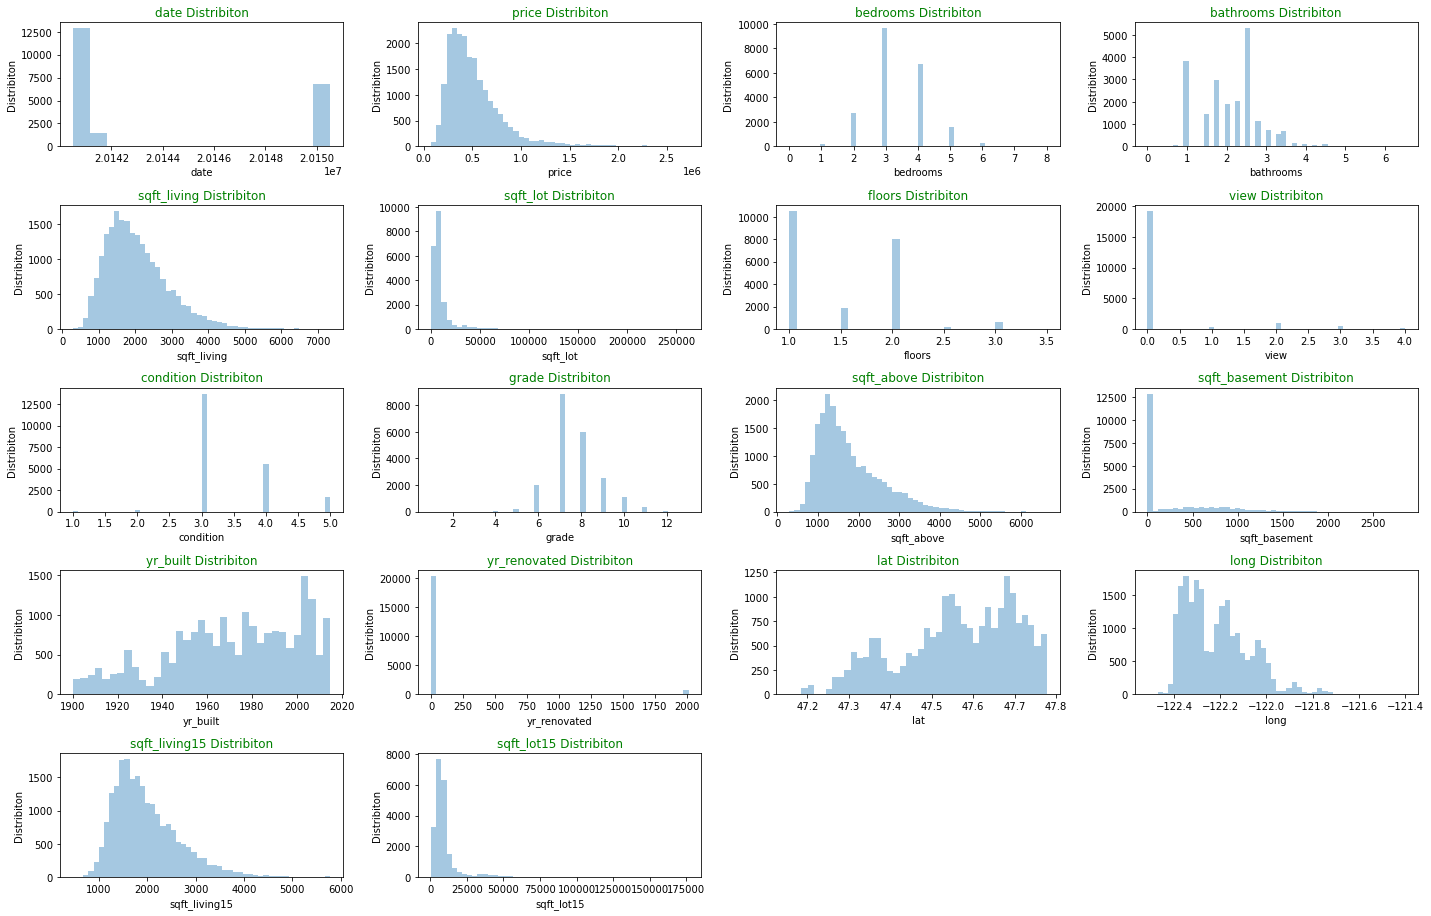

In [20]:
#Step 3: Data Exploration and Analysis
#Let's first look at the distribution graphs of our data.
f=plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    ax=f.add_subplot(8,4,i+1)
    sns.distplot(df[col].ffill(),kde=False)
    ax.set_title(col+" Distribiton",color='Green')
    plt.ylabel('Distribiton')
f.tight_layout()

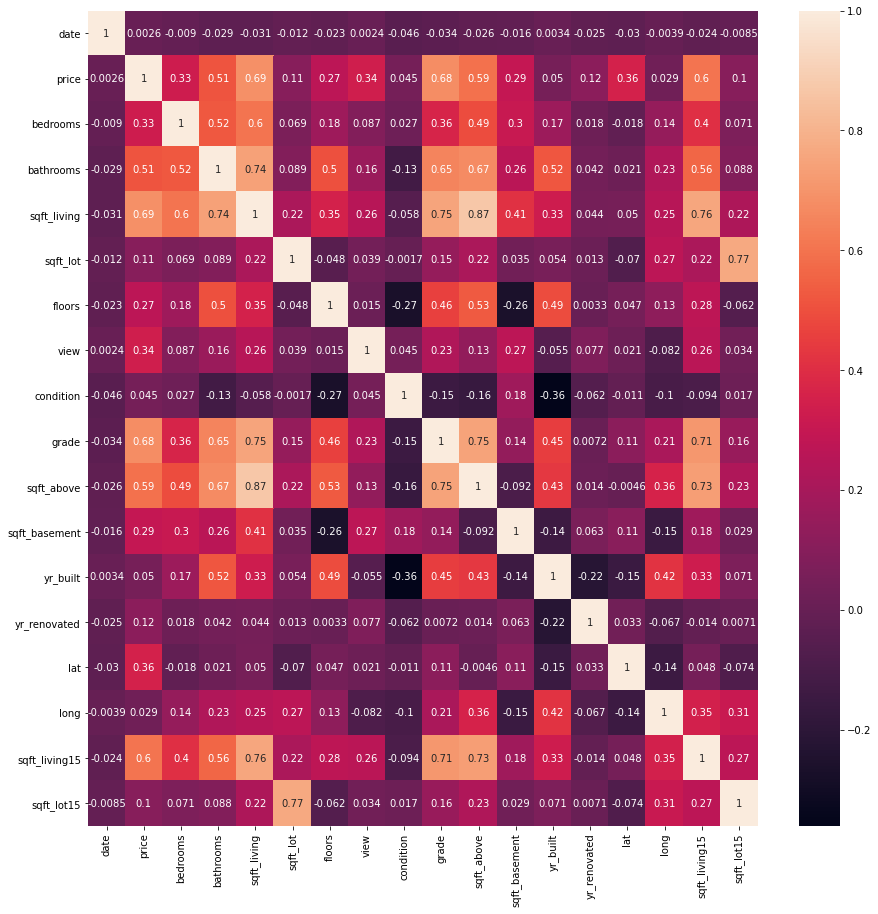

In [21]:
corr=df.corr()
f = plt.figure(figsize=(15, 15))
sns.heatmap(corr,annot=True)
plt.show()

In [22]:
#Let's take a look at the mathematical values in our data
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.112900e+04,2.112900e+04,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000,21129.000000
mean,2.014390e+07,5.233344e+05,3.364144,2.100088,2052.178191,11903.453831,1.490487,0.199678,3.409485,7.633537,1765.960197,286.217994,1970.923091,80.490795,47.560931,-122.215877,1972.740641,10403.953855
std,4.436076e+03,3.079151e+05,0.892994,0.749871,866.953753,20240.052581,0.539744,0.687716,0.649948,1.143555,792.783702,430.984810,29.381269,392.692352,0.138121,0.137593,673.483881,13653.302167
min,2.014050e+07,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.515000,460.000000,651.000000
25%,2.014072e+07,3.200000e+05,3.000000,1.500000,1420.000000,5001.000000,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.473000,-122.329000,1480.000000,5080.000000
50%,2.014102e+07,4.490000e+05,3.000000,2.250000,1900.000000,7526.000000,1.500000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,47.572600,-122.233000,1830.000000,7560.000000
75%,2.015022e+07,6.350000e+05,4.000000,2.500000,2520.000000,10360.000000,2.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,47.678500,-122.128000,2340.000000,9908.000000
max,2.015053e+07,2.725000e+06,8.000000,6.500000,7350.000000,262666.000000,3.500000,4.000000,5.000000,13.000000,6640.000000,2850.000000,2015.000000,2015.000000,47.777600,-121.402000,5790.000000,176418.000000


In [23]:
#Actually, we have labelled data and we can split our data into x and y and make predictions. Thus, we apply supervised learning.
#But before applying this, let's prove that our data is not suitable for unsupervised learning.
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
df2=df.copy()
for n_clusters in range(2,11):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df2)
    centers = km.cluster_centers_

    score = silhouette_score(df2, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.643523224911673
For n_clusters = 3, silhouette score is 0.5867866380552379
For n_clusters = 4, silhouette score is 0.540427456174777
For n_clusters = 5, silhouette score is 0.5382167803818612
For n_clusters = 6, silhouette score is 0.5132649331576659
For n_clusters = 7, silhouette score is 0.5006933334771948
For n_clusters = 8, silhouette score is 0.49935504628492544
For n_clusters = 9, silhouette score is 0.4854335103257106
For n_clusters = 10, silhouette score is 0.48087474032952104


In [24]:
#we choose k=2 because sihouette score is higher than others
km = KMeans(n_clusters=2)
km.fit(df2)

KMeans(n_clusters=2)

In [25]:
cluster_label = km.labels_
df2['KMEANS_LABELS'] = cluster_label

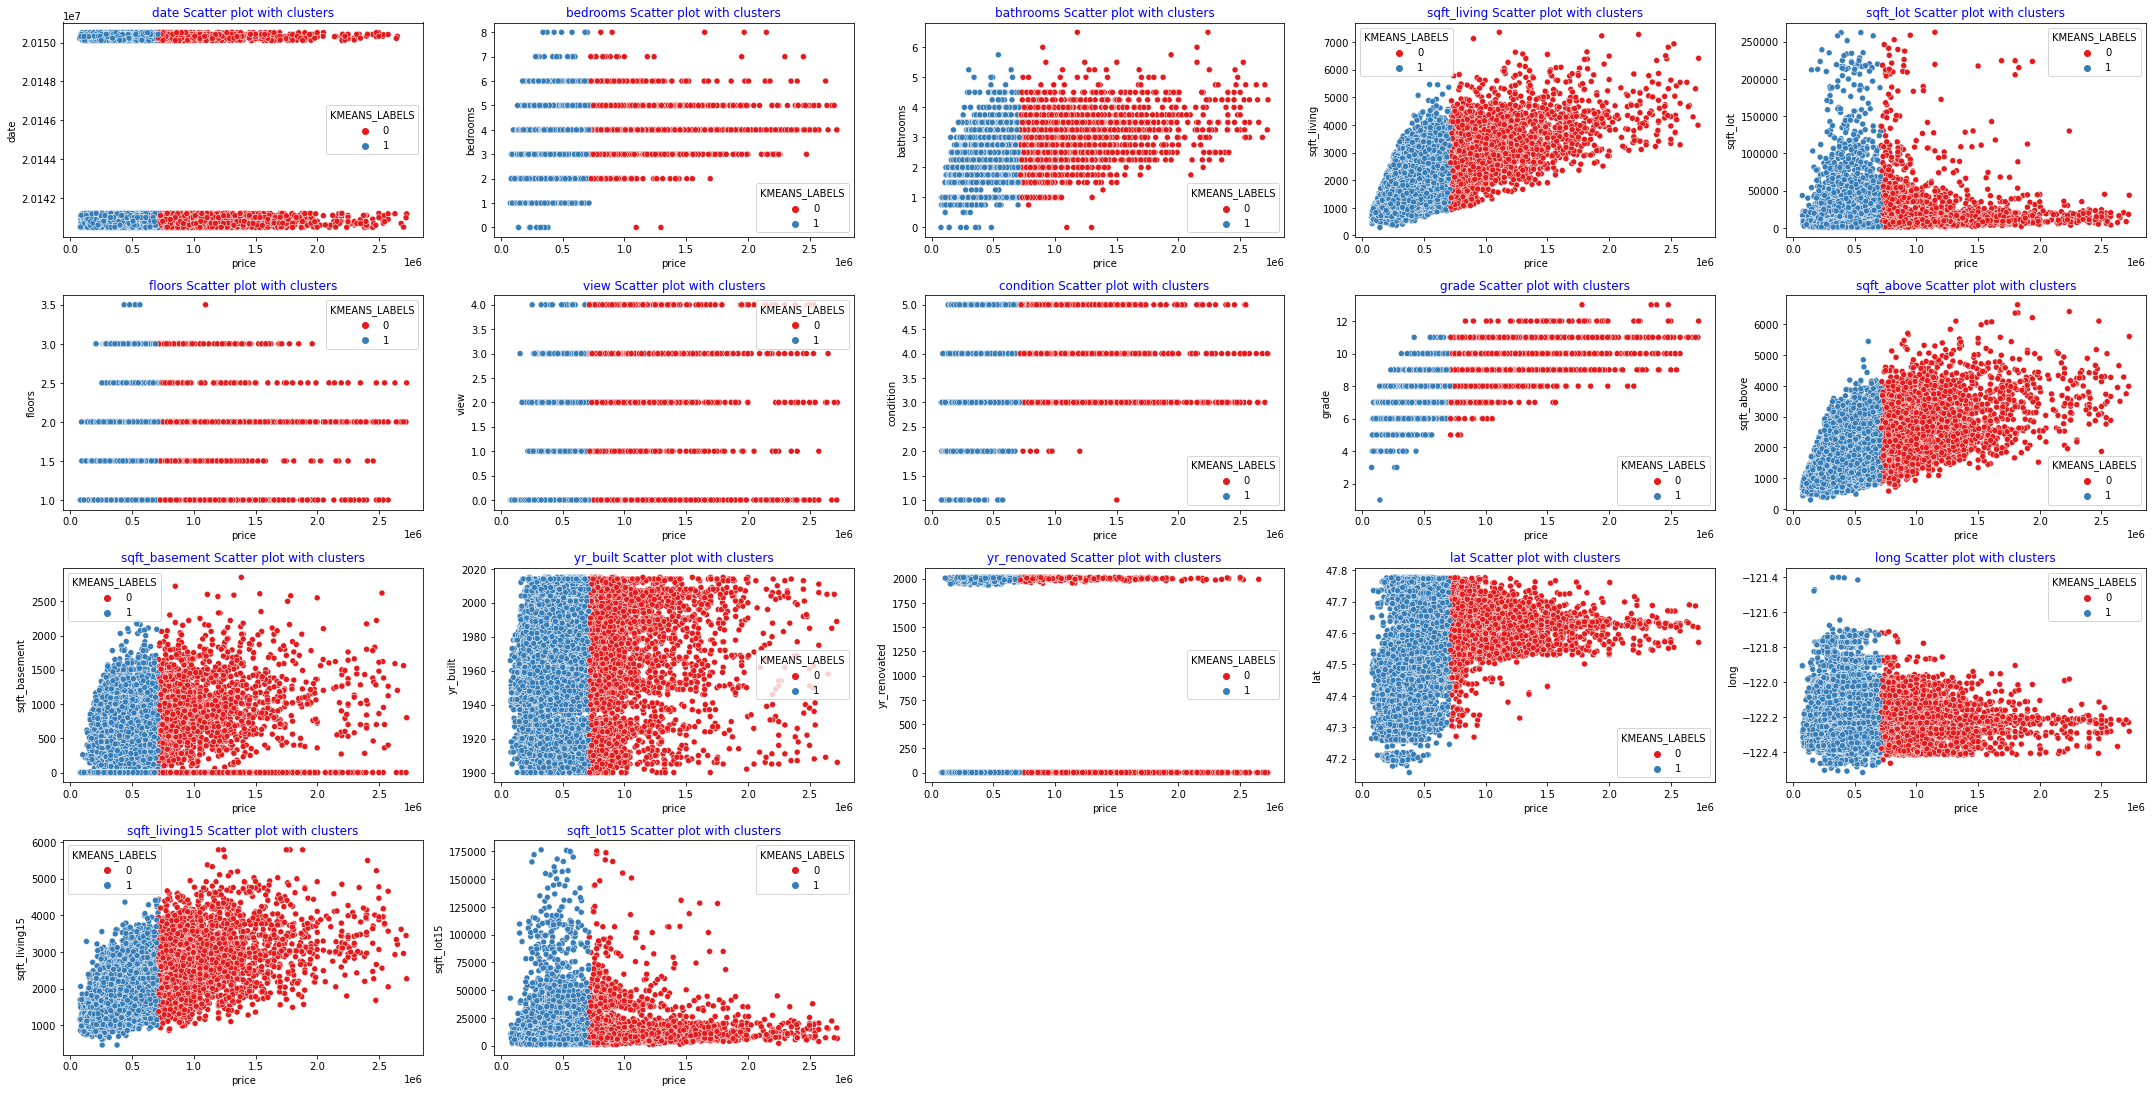

In [26]:
f=plt.figure(figsize=(30,30))
scatter_cols =['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(8,5,i+1)
    sns.scatterplot(x=df2['price'],y=df2[col],hue=df2['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

In [27]:
#Step 4: Predictive Modelling
#As we said before, we have labelled data. So we will use supervised learning to predict.
#Therefore, we will first use the linear regression model to predict the knn model later.
#Normally, it would be enough to use one model, but we wanted to use both and see which one we could predict better.
#In order to use both of these models, we first need to divide the data into two. Then we need to scale the data to a range.
#We wanted to use MinMaXScaler for scale operation.

In [28]:
#we split our data
X = df.drop('price', axis = 1).values 
y = df['price'].values

In [29]:
#scaling our data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,20150223,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,20140623,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,20150116,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [30]:
#We should also divide the data we divided into two as training, valid and test. We will use the training part 
#while training the data,and the valid and test parts while making the predictions.
#While we were dividing, we preferred 70% to 30% as a measure.
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state=0)
#here, we chose to choose the size of 50% by 50%.
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=0)

In [31]:
#Here we train the yield with a linear regression model. For this, we use our training data.
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
#we make predictions with valid data
predictions = lr.predict(X_valid)

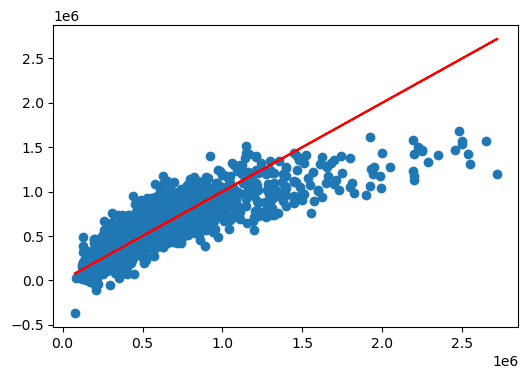

In [33]:
#here we have drawn a graph to compare the forecast results with the actual results
plt.figure(figsize = (6, 4), dpi = 100)
plt.scatter(y_valid,predictions)

# Perfect predictions
plt.plot(y_valid,y_valid,'r');

In [34]:
#making predict with knn regression model
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [35]:
#The elbow function calculates the error for each k value and returns it in a list.
#we will assign each k values to this function
def Elbow(k):
    neighbors=KNN(n_neighbors=k,metric='euclidean')
    neighbors.fit(X_train,y_train)
    prediction=neighbors.predict(X_test)
    eucerror=mse(y_test,prediction)
    neighbors=KNN(n_neighbors=k,metric='manhattan')
    neighbors.fit(X_train,y_train)
    prediction=neighbors.predict(X_test)
    manerror=mse(y_test,prediction)
    return [manerror,eucerror,k]

In [36]:
#Here, we called the elbow function for each k value and found how many k we should choose for the minimum eror.
minimum=0
k1=0
dict1={}
dict2={}
for k in range(40):
    k=k+1
    result=Elbow(k)
    dict1[result[2]]=result[0]
    dict2[result[2]]=result[1]
    if(result[0]<minimum or minimum==0):
        minimum=result[0]
        k1=result[2]
    if(result[1]<minimum):
        minimum=result[1]
        k1=result[2]
optimalmetric = 'manhattan'        
print("the minimum mse value=",minimum,"when k=",k1)
print("So optimal value of k=",k1)
print("Optimal Metric is = " , optimalmetric)

the minimum mse value= 18130103089.626118 when k= 8
So optimal value of k= 8
Optimal Metric is =  manhattan


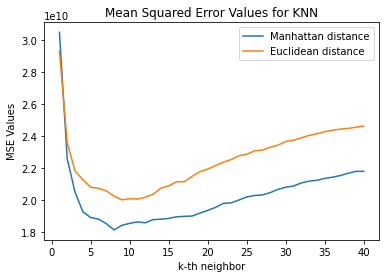

In [37]:
#Here, which distance parameter should we choose when calculating the eror?
#To find an answer to this question, we have drawn the error graph according to the distance parameters (manhattan or euclidean)
plt.plot(dict1.keys(), dict1.values(), label = "Manhattan distance")
plt.plot(dict2.keys(), dict2.values(), label = "Euclidean distance")
plt.legend()
plt.title("Mean Squared Error Values for KNN")
plt.xlabel('k-th neighbor') 
plt.ylabel('MSE Values')
plt.show()

In [38]:
#As a result, we see that Manhattan values are better for us because it gives less errors.
#now let's see how much error it gives for the best k value
k=k1
neighbors = KNN(n_neighbors=k,metric='manhattan')
neighbors.fit(X_train,y_train)
prediction_knn = neighbors.predict(X_valid)
error=mse(y_valid,prediction_knn)
print("Mean squared error =",error)

Mean squared error = 18115292887.50682


In [39]:
#Let's look at the r-square scores of our models separately and decide which one is better.
import sklearn
from sklearn.metrics import r2_score
print("knn regression r^2 score = " ,sklearn.metrics.r2_score(y_valid, prediction_knn))
print("linear regression r^2 score = ", sklearn.metrics.r2_score(y_valid, predictions))
#We see from the results that the knn regression model made us better estimates.

knn regression r^2 score =  0.8150476639903079
linear regression r^2 score =  0.7112993915601347


C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\zeyne\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0, 0.5, 'Density')

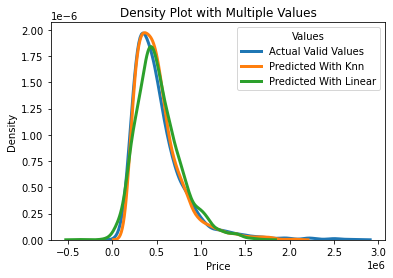

In [40]:
#Let's compare our estimates with our real values on a graph.
list = [y_valid, prediction_knn,predictions]
list2 = ["Actual Valid Values", "Predicted With Knn","Predicted With Linear"]
for i in range(3):
    sns.distplot(list[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = list2[i])
plt.legend(prop={'size': 10}, title = 'Values')
plt.title('Density Plot with Multiple Values')
plt.xlabel('Price')
plt.ylabel('Density')

In [41]:
#As a result of this graph, the estimations we made with the knn regression model are very close to the real values.
#The predictions we made with the linear regression model are actually not bad, but knn is better.
#That's why we prefer the knn regression model.

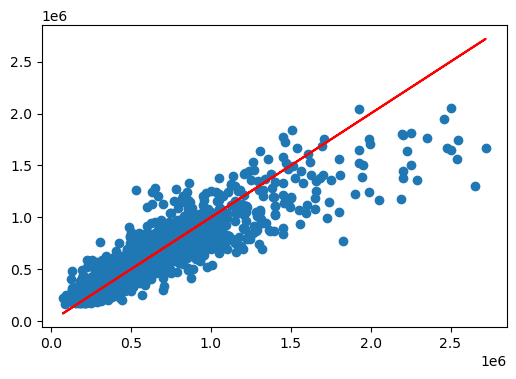

In [42]:
#Let's show the comparison of the estimations we made with the knn regression model with the real values in a separate graph.
plt.figure(figsize = (6, 4), dpi = 100)
plt.scatter(y_valid,prediction_knn)

# Perfect predictions
plt.plot(y_valid,y_valid,'r');

In [43]:
#As a result, we got very nice and close values.